# Week 1. 원티드 국민연금 DB를 이용해서 유니콘 기업 발굴하기

# EDA 목표
- 데이터들의 분포 (직원 수, 매출액, 보험료, +@)
- 몇몇 회사를 선택하여 데이터 흐름 살펴보기
- 데이터 사이의 관계에 대해 유의미한 결론을 찾아봅시다. (아이디어 수립 → EDA를 통해 관찰)<br>


# EDA 흐름
(1) 데이터의 기본적인 내용 파악<br>
(2) 각 피처의 데이터 특징 확인 <br>
(3) 실제 유니콘 기업의 정의 <br>
(4) 실제 유니콘 기업 데이터 특징 확인 <br>
(5) 유니콘 기업 선정 기준 정립 위한 EDA <br>
(6) EDA 결론

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

## (1) 데이터의 기본적인 내용 파악

### 요약 <br>
* 연매출액 단위: 천 원
* 2015년~2019년 데이터
* 월별 데이터: 직원수, 국민연금 보험료(인원수에 대한 상한선 존재)
* 데이터 Shape : (99801, 6)
* 데이터 type
    * 회사ID (int64)
    * 연매출액 (int64)
    * 년도(int64)
    * 월(int64)
    * 월별_연금보험료(int64)
    * 월별_직원수(int64)
* 5000개 기업으로 구성된 데이터

In [3]:
df = pd.read_csv('./company_nps_data.csv', encoding='cp949')
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


### 기본적인 정보

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [7]:
# 결측치 확인
df.isnull().sum().to_frame().T

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,0,0,0,0,0,0


* 모든 데이터는 int type
* 당장 눈에 보이는 null은 없음

In [8]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


* 월별 연금보험료와 월별 직원수가 0인 회사 존재
* 연매출액이 마이너스인 회사 존재
* 연매출액과 월별 연금보험료, 월별 직원수 모두 최댓값과 제3사분위수값의 차이가 큼

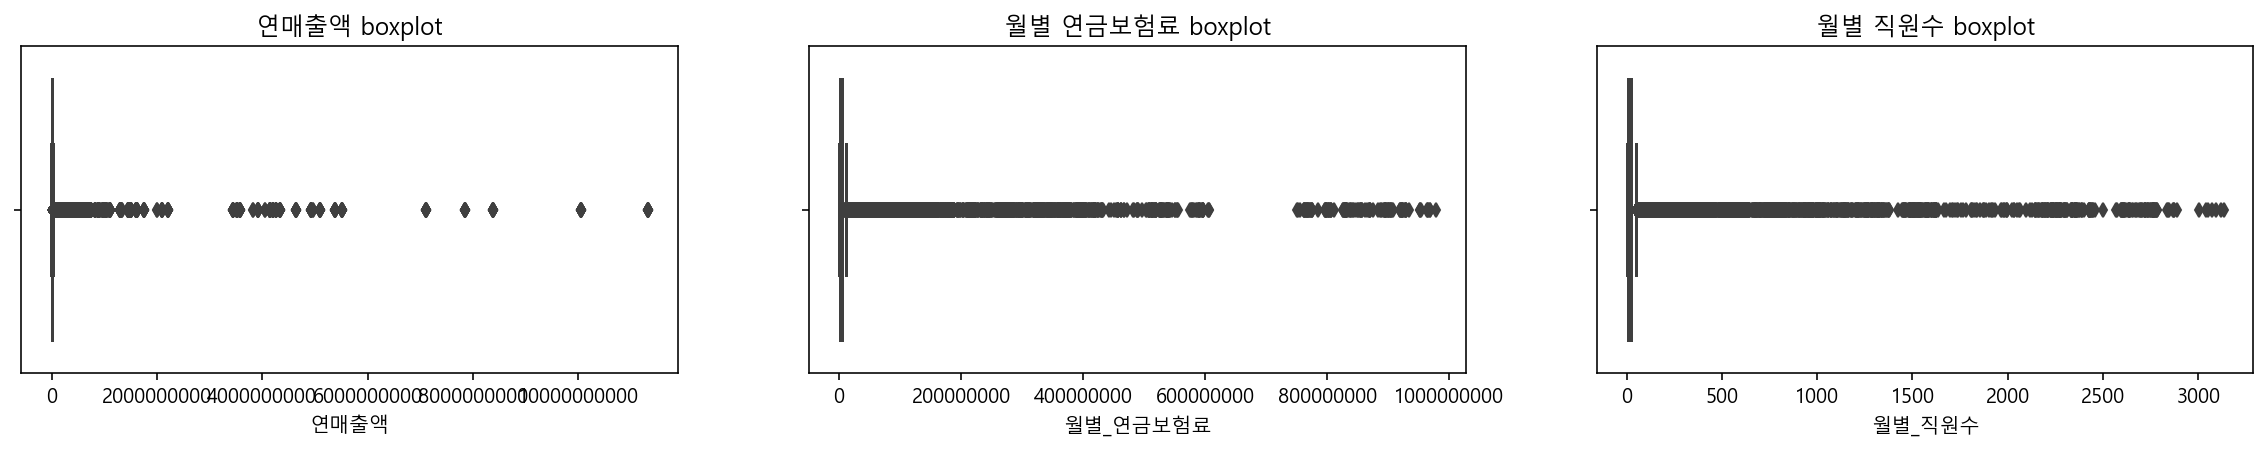

In [42]:
# 연매출액, 월별 연금보험료, 월별 직원수 Outlier 확인
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches([20, 3])

sns.boxplot(data=df, x='연매출액', ax=ax1)
sns.boxplot(data=df, x='월별_연금보험료', ax=ax2)
sns.boxplot(data=df, x='월별_직원수', ax=ax3)
ax1.set_title('연매출액 boxplot')
ax2.set_title('월별 연금보험료 boxplot')
ax3.set_title('월별 직원수 boxplot')
ax1.get_xaxis().get_major_formatter().set_scientific(False)
ax2.get_xaxis().get_major_formatter().set_scientific(False)
ax3.get_xaxis().get_major_formatter().set_scientific(False)

## (2) 각 피처의 데이터 특징 확인

### 회사ID

In [43]:
df['회사ID'].nunique()

5000

* 5000개의 회사 존재

In [45]:
# 회사 분포
df_company=df['회사ID']
df_company.drop_duplicates(inplace=True)
df_company

0         233757
1         123464
2         342124
3         386420
4         129243
          ...   
96348     580794
96578    2256869
96888     547774
97566     413938
98769      96128
Name: 회사ID, Length: 5000, dtype: int64

### 연매출액

In [46]:
print(df['연매출액'].min())
print(df['연매출액'].max())

-7882176
11328779396


* 연매출액 최솟값: 약 -78억 원 
* 연매출액 최댓값: 약 11조 원

In [54]:
# 연매출액 10조원 이상인 회사
df.loc[df['연매출액'] >= 10000000000].sort_values(by='회사ID')

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
53569,63,11328779396,2018,12,419953960,1014
80947,63,11328779396,2018,3,404826240,1013
80770,63,11328779396,2018,4,404211800,1012
79358,63,11328779396,2018,9,416186660,999
74251,63,11328779396,2018,2,406770960,1018
52606,63,11328779396,2018,8,418292620,1011
33039,63,11328779396,2018,1,403119840,1006
98243,63,11328779396,2018,11,414081820,995
23648,63,11328779396,2018,10,414503020,996
23302,63,11328779396,2018,7,418169080,1009


* 연매출액 10조원 이상 기업 : 2곳(63, 419945)
* 63회사는 2018년 데이터만, 419945회사는 2019년 데이터만 존재

In [55]:
# 연매출액의 성장률을 추출하기 위해 피벗테이블을 활용하여 '회사ID', '년도', '연매출액'만 추출
ndf = df.pivot_table('연매출액','회사ID','년도')
ndf.index = ndf.index.map(lambda x : str(x))
ndf.columns = ndf.columns.map(lambda x : str(x))
ndf

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,NaN,NaN,NaN,11328779396.00,NaN
95,NaN,NaN,NaN,656947437.00,NaN
102,NaN,NaN,NaN,742658938.00,NaN
295,NaN,NaN,NaN,83776697.00,NaN
414,NaN,NaN,NaN,19732769.00,NaN
...,...,...,...,...,...
2400284,NaN,NaN,NaN,1263406.00,NaN
2437574,NaN,NaN,NaN,214016.00,NaN
2693684,NaN,NaN,NaN,NaN,238076.00


* 회사ID별 연매출액 결측값이 많이 존재하는 것을 확인할 수 있음

Text(0.5, 1.0, '전체 회사 연매출액 추이')

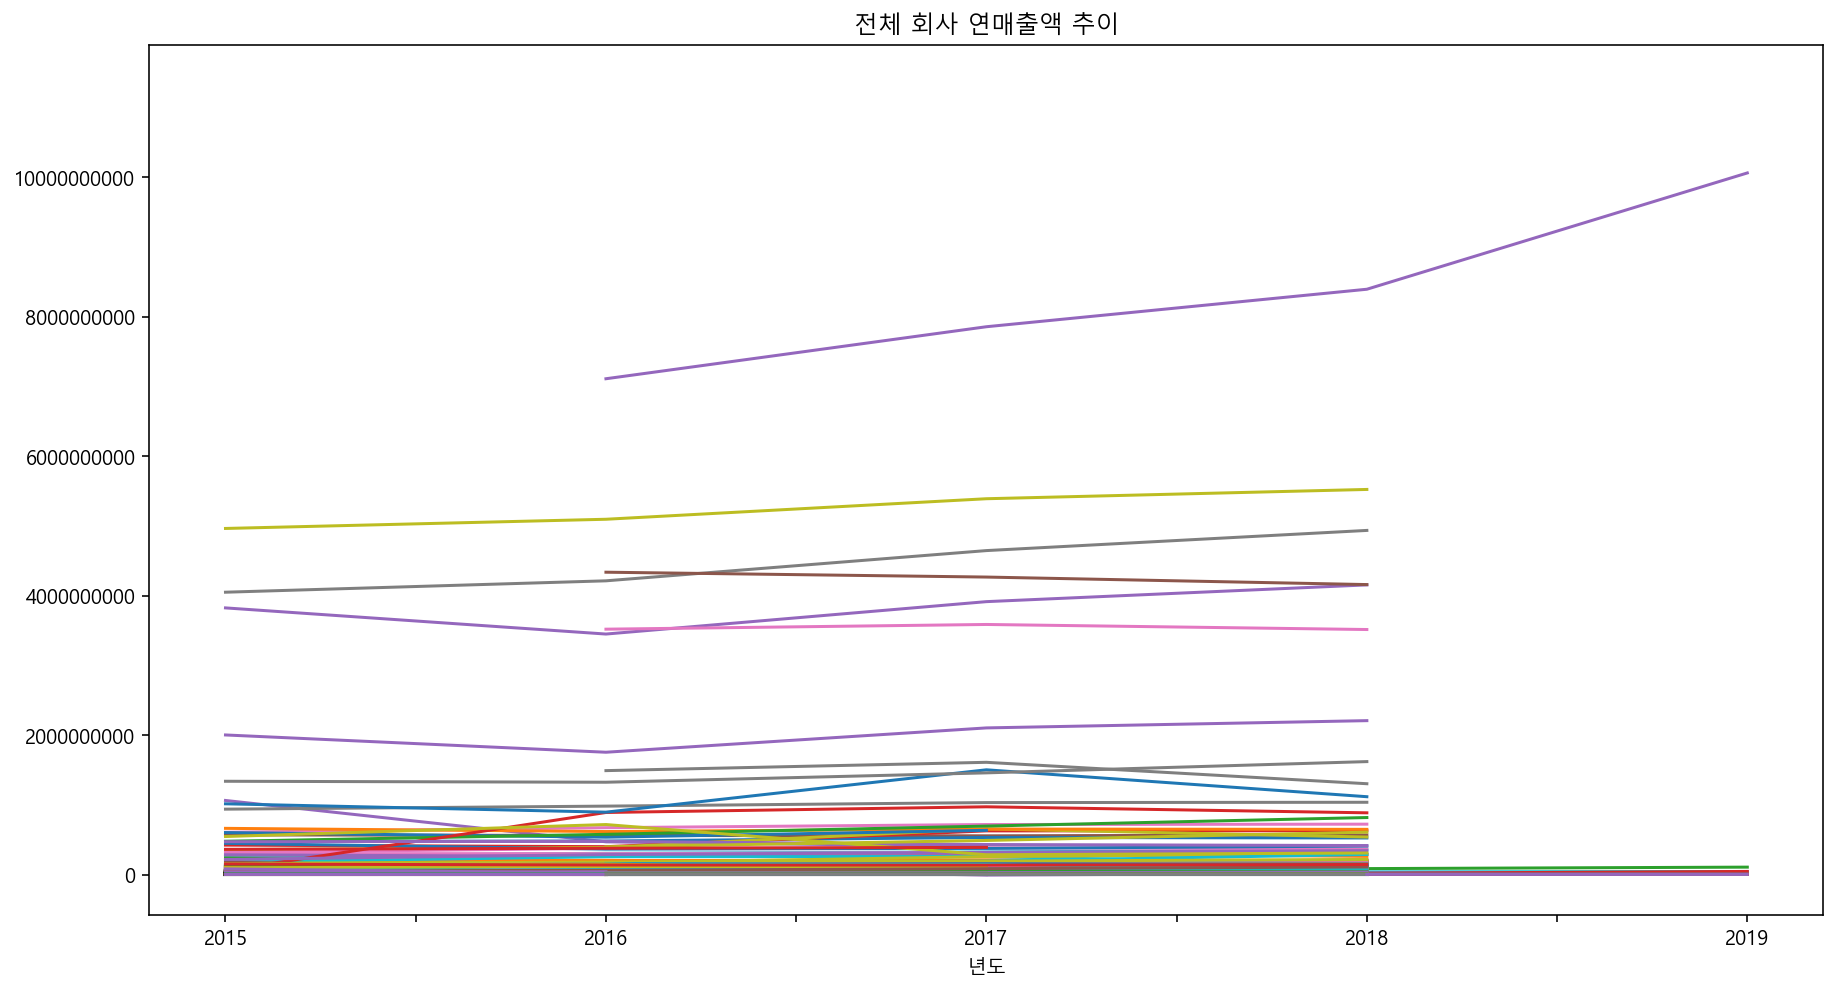

In [67]:
# 전체 회사별 연매출액 추이
ax = ndf.T.plot(figsize=(15,8),legend=False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('전체 회사 연매출액 추이')

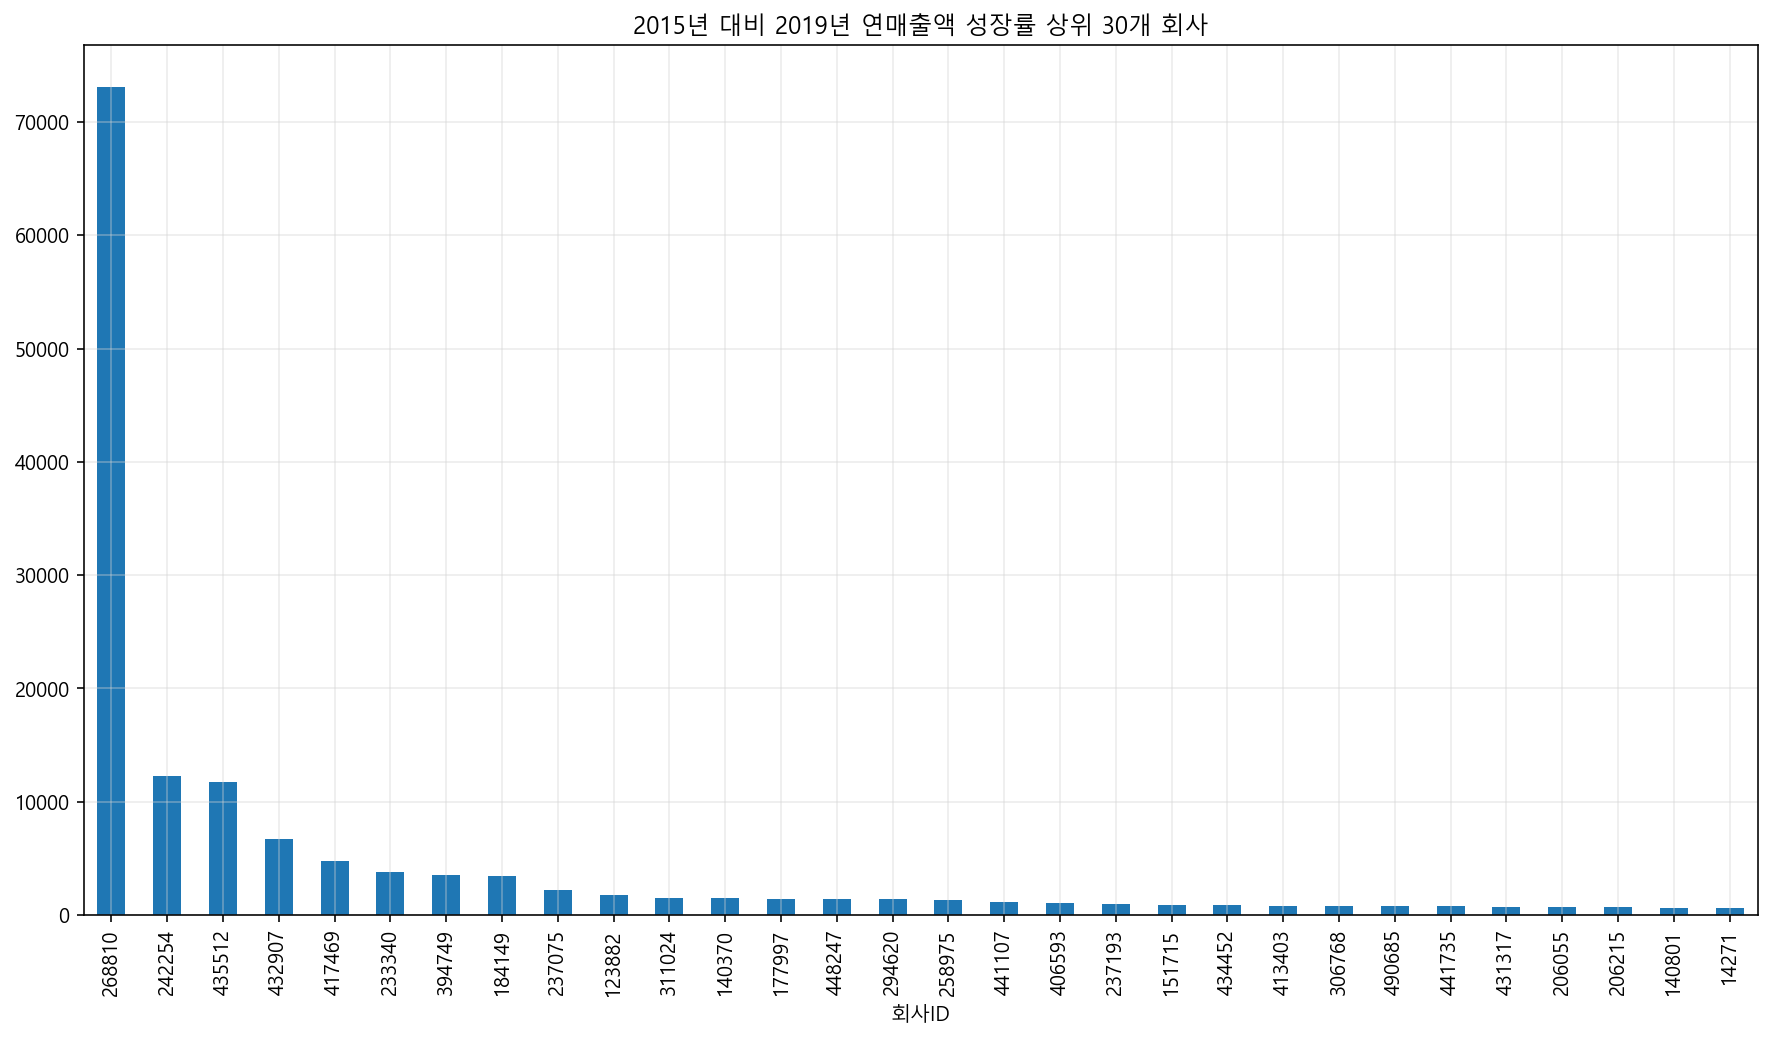

In [69]:
# 2015년 대비 2019년 회사별 연매출액이 얼마나 성장했는지를 나타내는 성장률 컬럼 생성
# 이를 위해 임시적으로 결측치를 앞뒤 방향의 값으로 채워줌
ndf.T.fillna(method = 'ffill',inplace=True)
ndf.T.fillna(method = 'bfill',inplace=True)

ndf1 = ndf[['2015','2019']]
ndf1['성장률'] = ((ndf1['2019']-ndf1['2015'])/ndf1['2015'])*100
ndf1['성장률'].sort_values(ascending=False).head(30).plot(kind='bar',figsize=(15,8))
plt.title('2015년 대비 2019년 연매출액 성장률 상위 30개 회사')
plt.grid(color='lightgrey', alpha=0.43)

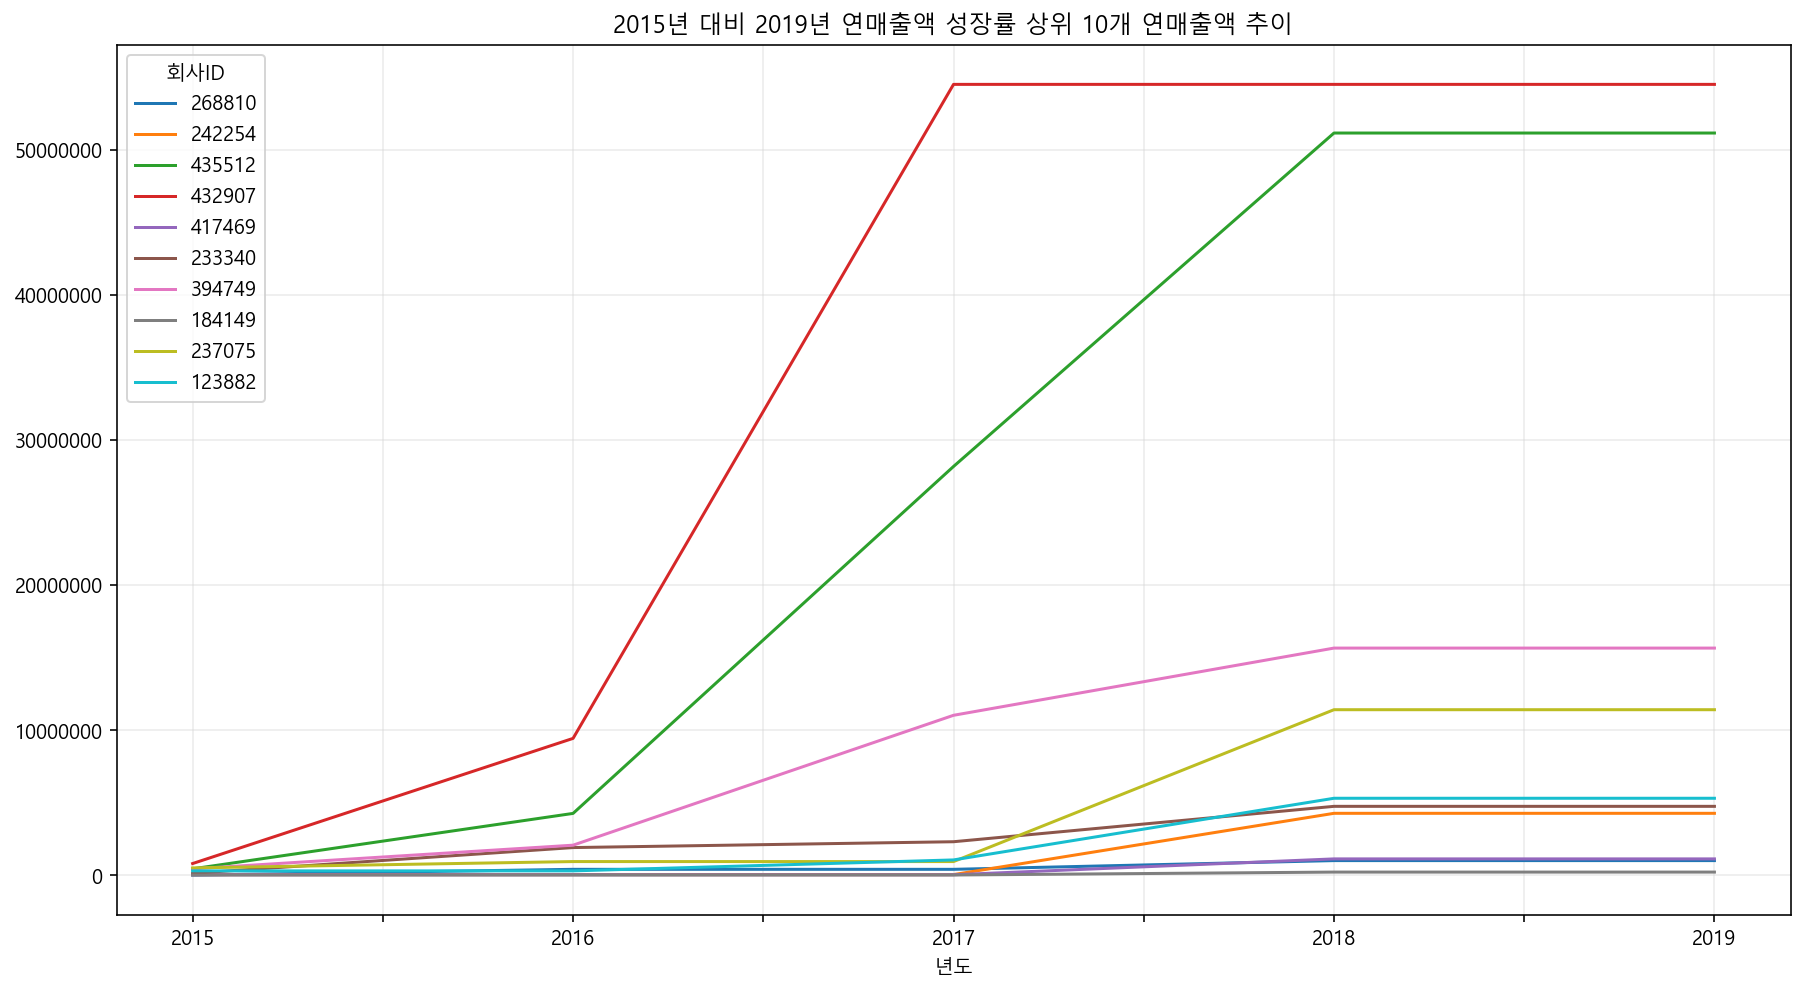

In [73]:
# 연매출액 성장률 상위 10개 회사 추이 그래프
n_ndf = ndf.loc[['268810','242254','435512','432907','417469','233340','394749','184149','237075','123882']]
ax = n_ndf.T.plot(figsize=(15,8))
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('2015년 대비 2019년 연매출액 성장률 상위 10개 연매출액 추이')
plt.grid(color='lightgrey', alpha=0.43)

* 2015년 대비 2019년 연매출액 성장률 상위 10개 기업 중 2019년 연매출이 100억 원 미만인 기업들 존재
* **유니콘 기업을 선정하기 위해 연매출액과 성장률의 최소 기준을 정해야 함**

### 년도 & 월

In [81]:
data = df.copy()
data['Date'] = pd.to_datetime(data['년도'].astype(str) + data['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,Date
0,233757,41688077,2018,7,8912380,36,2018/07
1,123464,1760695,2018,3,942380,5,2018/03
2,342124,3221341,2018,7,781180,4,2018/07
3,386420,4815584,2015,11,3795900,14,2015/11
4,129243,9799736,2018,10,40724680,151,2018/10


In [82]:
print(data['Date'].min())
print(data['Date'].max())

2015/11
2019/12


* 년도/월 : 2015년 11월~2019년 12월 

### 월별 연금 보험료 & 월별 직원수

In [75]:
df.loc[df['월별_연금보험료'] == 0, '회사ID'].nunique()

11

* 월별 연금보험료가 0인 기업(중복은 1회로 count) : 11개

In [77]:
print(df.loc[df['월별_직원수'] == 0, '회사ID'].nunique())
print(df.loc[df['월별_직원수'] < 10, '회사ID'].nunique())

11
3178


* 월별 직원수가 0명인 기업(중복은 1회로 count): 11개
* 월별 직원수가 10명 미만인 기업(중복은 1회로 count): 3178개
* 유니콘 기업을 선정하기 위한 기준 필요

### 연매출액 & 월별 연금 보험료 & 월별 직원수

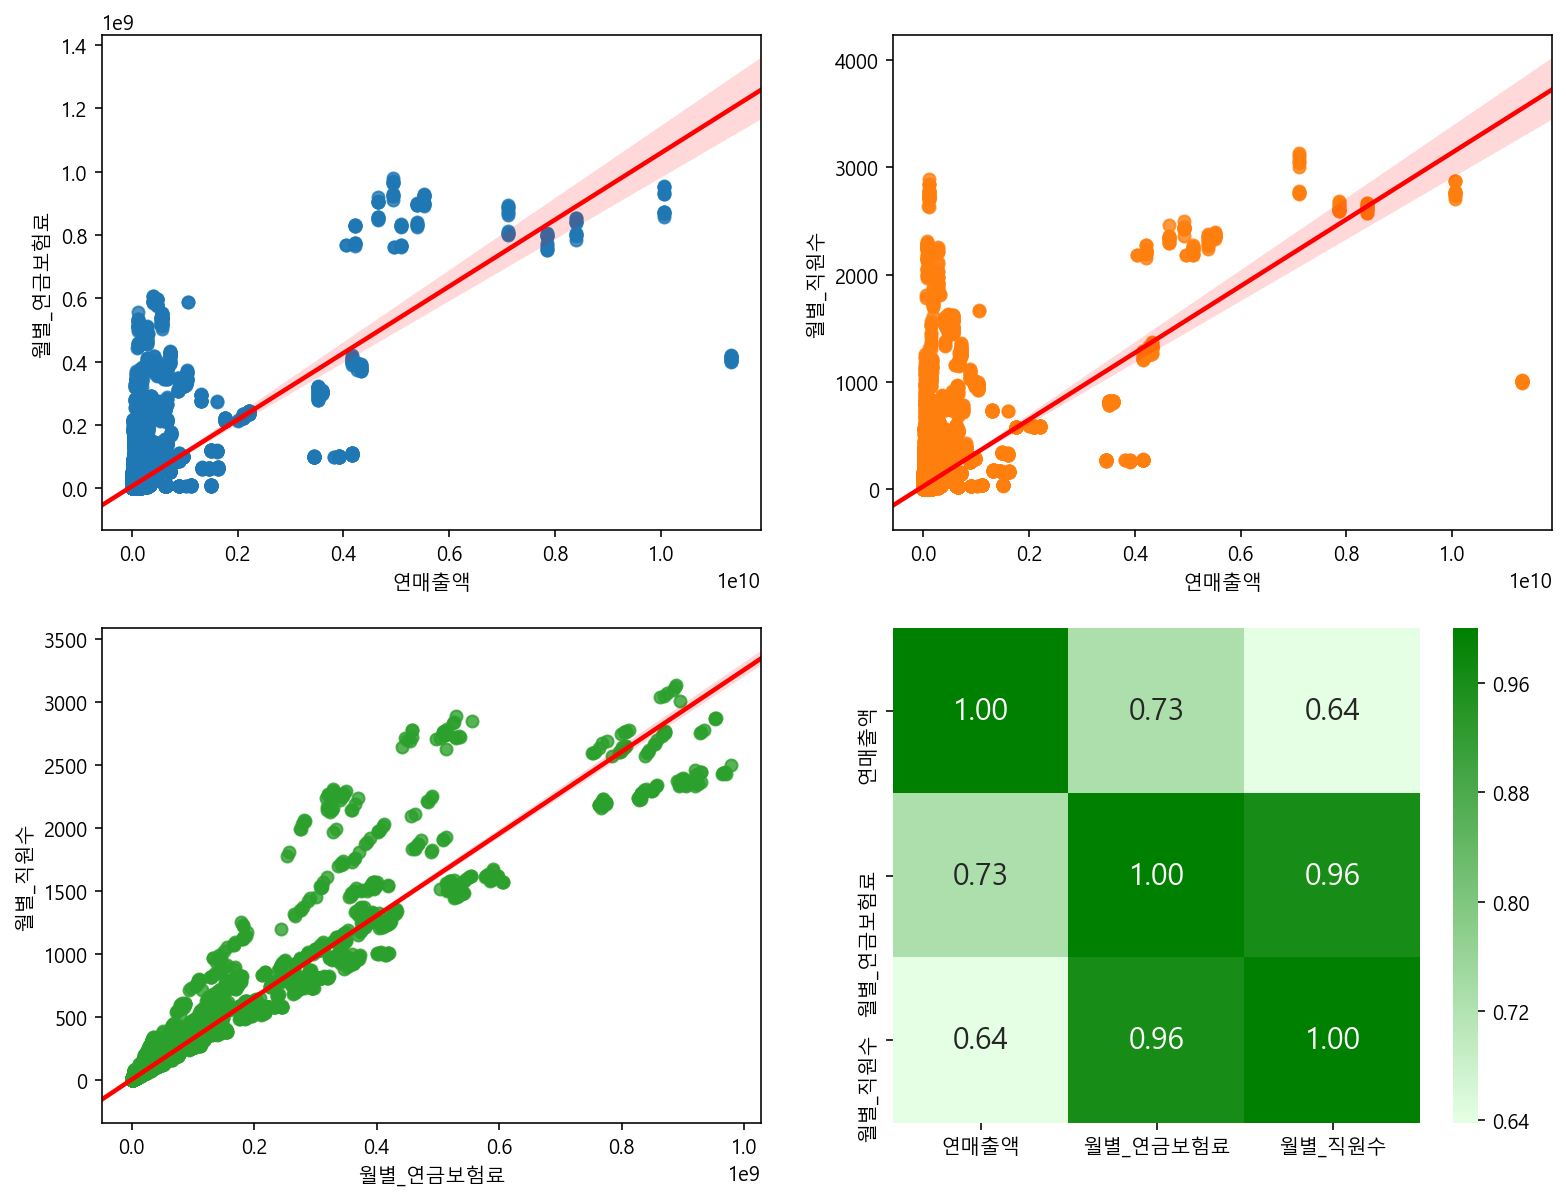

In [143]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.set_size_inches([13, 10])
sns.regplot(x="연매출액", y="월별_연금보험료", data=df, line_kws={'color':"red"}, ax=ax1)
sns.regplot(x="연매출액", y="월별_직원수", data=df, line_kws={'color':"red"}, ax=ax2)
sns.regplot(x="월별_연금보험료", y="월별_직원수", data=df, line_kws={'color':"red"}, ax=ax3)
cm = sns.light_palette('green', as_cmap=True) 
ax2 = sns.heatmap(data=df[['연매출액', '월별_연금보험료', '월별_직원수']].corr(),
                    annot=True,
                    fmt='.2f',
                    annot_kws={'size':15},
                    cmap=cm, ax=ax4)
# ax1.set_title('연매출액 & 월별 연금보험료')
# ax2.set_title('연매출액 & 월별 직원수')
# ax3.set_title('월별 연금보험료 & 월별 직원수')
# ax4.set_title('연매출액 & 월별 연금보험료 & 월별 직원수 상관관계 히트맵')

* 연매출액과 월별 연금보험료는 선형적 관계(강한 양의 상관관계: 0.73)
* 연매출액과 월별 직원수는 선형적 관계(양의 상관관계: 0.64)
* 월별 연금보험료와 월별 직원수는 선형적 관계(강한 양의 상관관계: 0.96)

## (3) 실제 유니콘 기업의 정의
### 유니콘 기업: 기업 가치가 1조 원 이상이고 창업한 지 10년 이하인 비상장 스타트업 기업

* **주어진 데이터에선 기업가치와 직접적으로 연관된 칼럼을 찾기 힘들기 때문에 실제 유니콘 기업의 특징을 파악하여 일정 기준을 세팅한 다음, 그 기준에 맞춰서 유니콘 기업을 추출하는 방향으로 설정**
* **주어진 데이터의 컬럼들을 조합하여 유의미한 새로운 피처를 발굴하고, 실제 유니콘 기업과의 교집합이 큰 기업 선정**

## (4) 실제 유니콘 기업 데이터 특징 확인

* 크레딧잡, 중소기업현황정보시스템 활용하여 11개 유니콘 기업 데이터 수집 및 데이터셋 생성
* 원티드로부터 제공받은 데이터와 똑같은 컬럼과 동일 포맷으로 구성
* 2015~2019년 데이터
* 연매출액 단위: 천 원
* 결측치 없음

In [83]:
uni = pd.read_csv('./유니콘 취합.csv', encoding='cp949')
print(uni.shape)
uni.head()

(550, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


In [87]:
display(uni.info())
display(uni.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      550 non-null    object 
 1   연매출액      550 non-null    int64  
 2   년도        550 non-null    int64  
 3   월         550 non-null    int64  
 4   월별_연금보험료  550 non-null    float64
 5   월별_직원수    550 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 25.9+ KB


None

,연매출액,년도,월,월별_연금보험료,월별_직원수
count,550.00,550.00,550.00,550.00,550.00
mean,536922275.17,2017.40,6.70,191932076.19,751.63
std,1248234368.44,1.20,3.53,341714831.82,1699.01
min,99100.00,2015.00,1.00,488133.00,7.00
25%,54527868.00,2016.00,4.00,14319755.46,100.00
50%,151000000.00,2017.00,7.00,30395216.40,209.50
75%,396118457.00,2018.00,10.00,128292315.45,355.00
max,7140720000.00,2019.00,12.00,1604615875.00,9032.00


* 연매출액 단순 평균값: 536922275.17
* 연매출액 최솟값: 99100.00
* 월별 연금보험료의 단순 평균값: 191932076.19
* 월별 연금보험료의 최솟값: 488133.00
* 월별 직원수 단순 평균값: 751.63
* 월별 직원수 최솟값: 7.00

## 유니콘 기업 선정 기준 정립 위한 EDA

### 연평균 성장률(CARG) 공식: CAGR = ((종료값/초기값)^(1/기간수)) - 1

유니콘 기업 선정일
* 쿠팡 (2014.05)
* 옐로모바일 (2014.11)
* L&P코스메틱 (2017.04)
* 크래프톤 (2018.08) 
* 비바리퍼블리카(2018.12)
* 우아한형제들(2018.12)
* 야놀자(2019.02)
* 지피클럽(2019.06)
* 무신사(2019.11)
* 에이프로젠(2019.12)
* 쏘카(2020.10)

### 연매출액 관련

In [89]:
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


Text(0.5, 1.0, '쿠팡 & 크래프톤 제외 유니콘 매출 추이(2015~2019)')

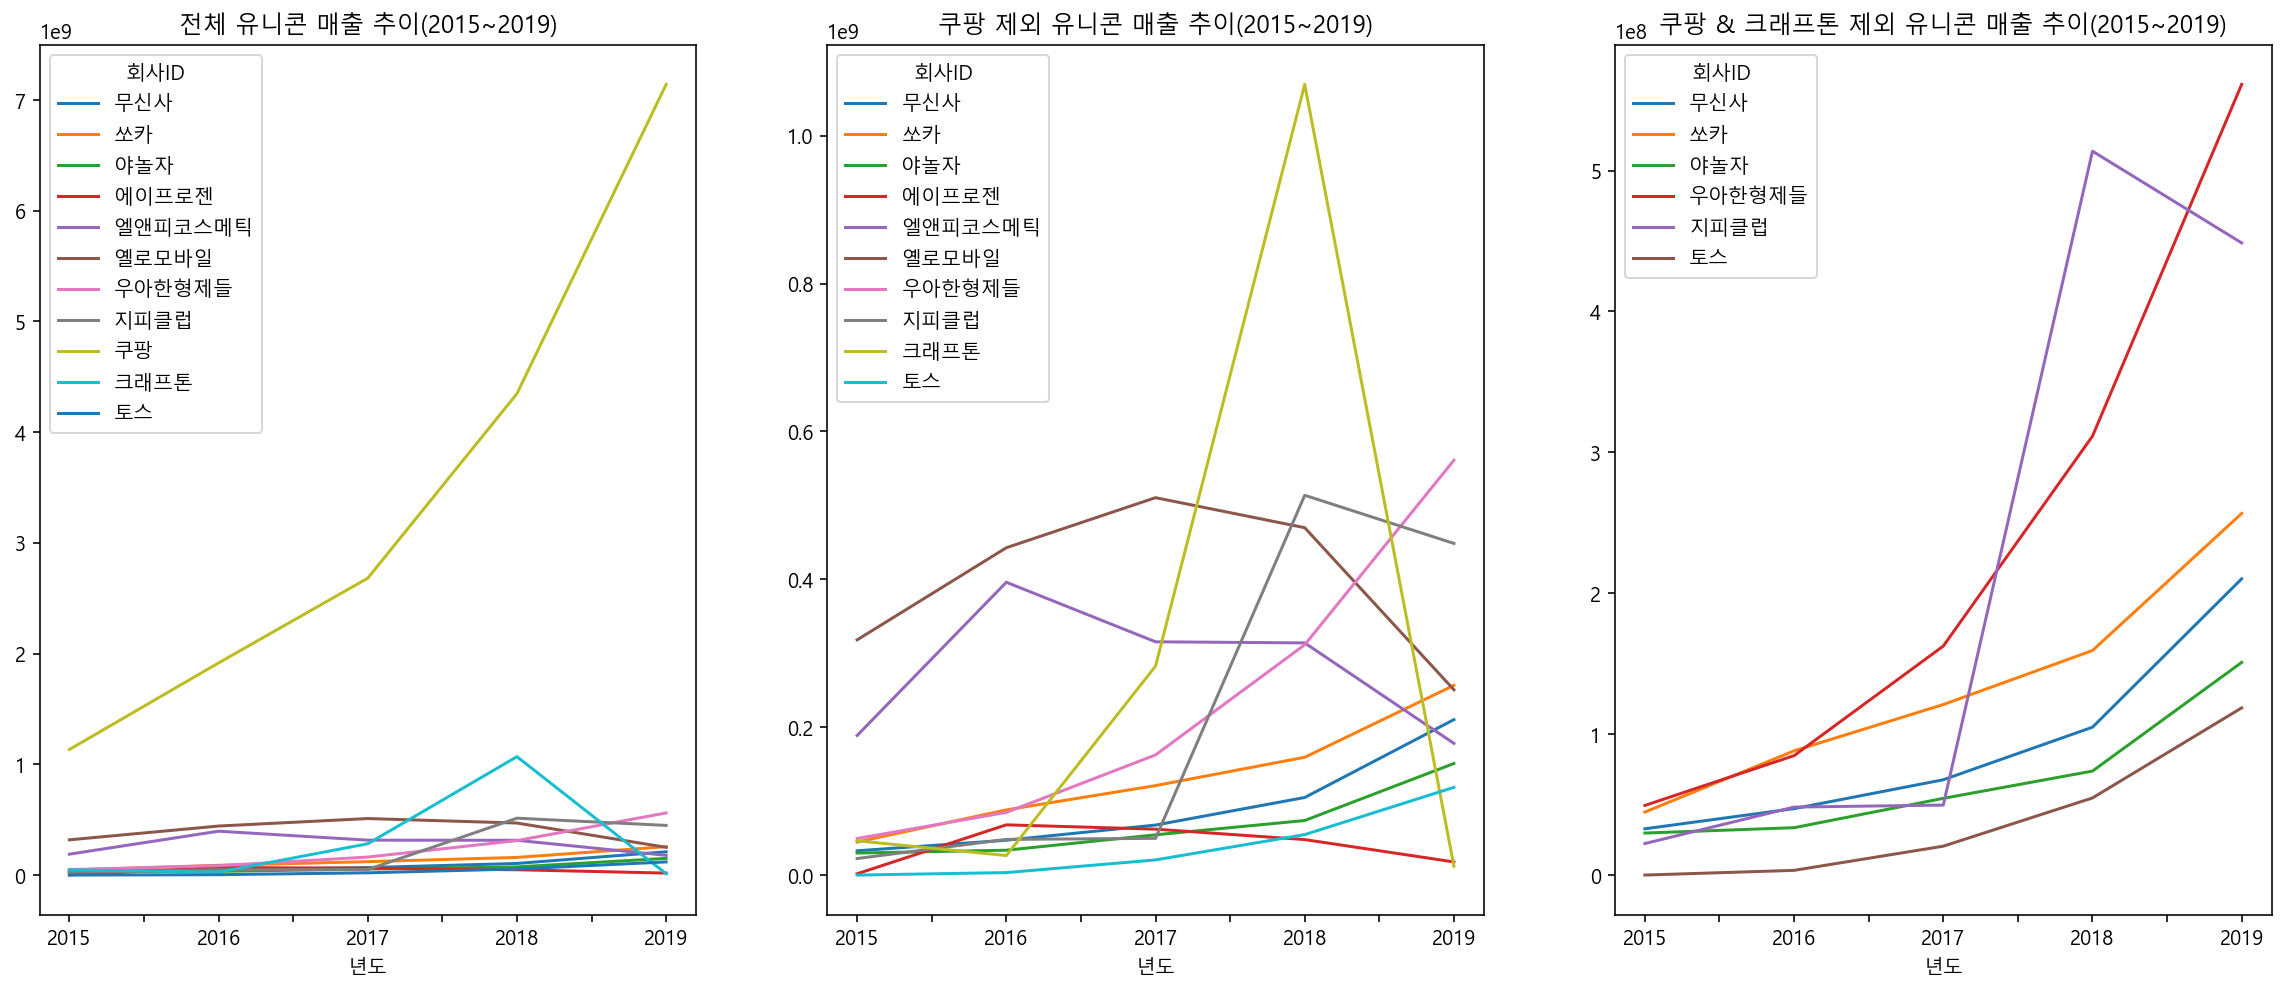

In [129]:
ndf = uni.pivot_table('연매출액','회사ID','년도')
ndf.columns = ndf.columns.map(lambda x : str(x))
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches([20, 8])
ndf.T.plot(ax=ax1)
ndf[ndf.index != '쿠팡'].T.plot(ax=ax2)
ndf.loc[(ndf.index != '쿠팡') & (ndf.index != '크래프톤')& (ndf.index != '에이프로젠')& (ndf.index != '옐로모바일')& (ndf.index != '엘앤피코스메틱')].T.plot(ax=ax3)
ax1.set_title('전체 유니콘 매출 추이(2015~2019)')
ax2.set_title('쿠팡 제외 유니콘 매출 추이(2015~2019)')
ax3.set_title('쿠팡 & 크래프톤 제외 유니콘 매출 추이(2015~2019)')

* 2014년에 유니콘 선정된 쿠팡과 옐로모바일을 제외한 크래프톤(2018), 토스(2018), 우아한형제들(2018), 야놀자(2019), 지피클럽(2019), 무신사(2019), 쏘카(2020) 등 주요 유니콘 기업들의 매출 추이는 유니콘 선정에 가까울수록 대체로 증가하는 모양새
* 단, 크래프톤은 유니콘 기업 선정 다음 해에 연매출 급락
* 에이프로젠(2019)은 큰 매출 변동이 없었고, 엘앤피코스메틱(2017)의 연매출은 유니콘 선정
* 괄호 안 숫자는 유니콘 선정 시점

* 유니콘 기업 선정을 위해 연매출 수치값의 기준이 필요하다

### 연매출액 성장률 관련

In [147]:
uni3 = uni.copy()
uni3 = uni3.pivot_table(index='회사ID', columns='년도', values='연매출액')

년도,2015,2016,2017,2018,2019
회사ID,,,,,
무신사,32930316,47231240,67721259,105012384,210312756
쏘카,44800000,88240403,121086079,159424490,256671600
야놀자,29899218,33709355,54527868,73884856,151000000
에이프로젠,1823518,68032078,62178381,48100298,17857139
엘앤피코스메틱,188859253,396118457,315572296,314078749,178190156
옐로모바일,318200000,442800000,510500000,469900000,250700000
우아한형제들,49500000,84850263,162565237,311535460,561133434
지피클럽,22474017,48329929,49755792,513728710,448642100
쿠팡,1133752000,1915941000,2681390000,4347684000,7140720000


In [148]:
# 유니콘 데이터 연매출액 연평균 성장률(CARG) 계산
# 유니콘 데이터는 2015년~2019년까지 결측치가 없으므로 <기간수 컬럼 value = 4>로 설정
uni3['기간수'] = 4
uni3['연평균 성장률(%)'] = ((uni3[2019]/uni3[2015]) ** (1/uni3['기간수']) - 1) * 100

display(uni3.describe())
display(uni3.sort_values(by="연평균 성장률(%)", ascending=False).head())

년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,169885220.18,286837507.36,393506218.00,678876346.36,849641871.45,4.00,86.03
std,333757220.44,560786109.46,773437303.30,1253162515.22,2093019482.77,0.00,139.85
min,99100.00,3439965.00,20591083.00,48100298.00,12102432.00,4.00,-28.54
25%,26186617.50,40470297.50,58353124.50,89448620.00,134865484.50,4.00,24.23
50%,44800000.00,68032078.00,121086079.00,311535460.00,210312756.00,4.00,58.42
75%,119179626.50,242179430.00,299126349.50,491814355.00,352656850.00,4.00,80.20
max,1133752000.00,1915941000.00,2681390000.00,4347684000.00,7140720000.00,4.00,488.33


년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
회사ID,,,,,,,
토스,99100,3439965,20591083,54820876,118730969,4,488.33
지피클럽,22474017,48329929,49755792,513728710,448642100,4,111.38
우아한형제들,49500000,84850263,162565237,311535460,561133434,4,83.49
에이프로젠,1823518,68032078,62178381,48100298,17857139,4,76.90
무신사,32930316,47231240,67721259,105012384,210312756,4,58.97


* 유니콘 기업 선정을 위한 연매출액 성장률과 일인당 매출액 성장률의 기준이 필요하다

### 직원수 관련

In [91]:
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


In [158]:
uni.pivot_table(index='회사ID',
                columns='년도',
                values='월별_직원수',
                aggfunc='min')

년도,2015,2016,2017,2018,2019
회사ID,,,,,
무신사,61,67,80,117,180
쏘카,89,98,266,266,292
야놀자,130,156,219,297,419
에이프로젠,84,86,130,107,126
엘앤피코스메틱,95,119,193,207,237
옐로모바일,35,35,126,34,11
우아한형제들,216,219,388,519,739
지피클럽,7,7,11,12,69
쿠팡,5465,4492,4905,5375,6188


<AxesSubplot:xlabel='년도'>

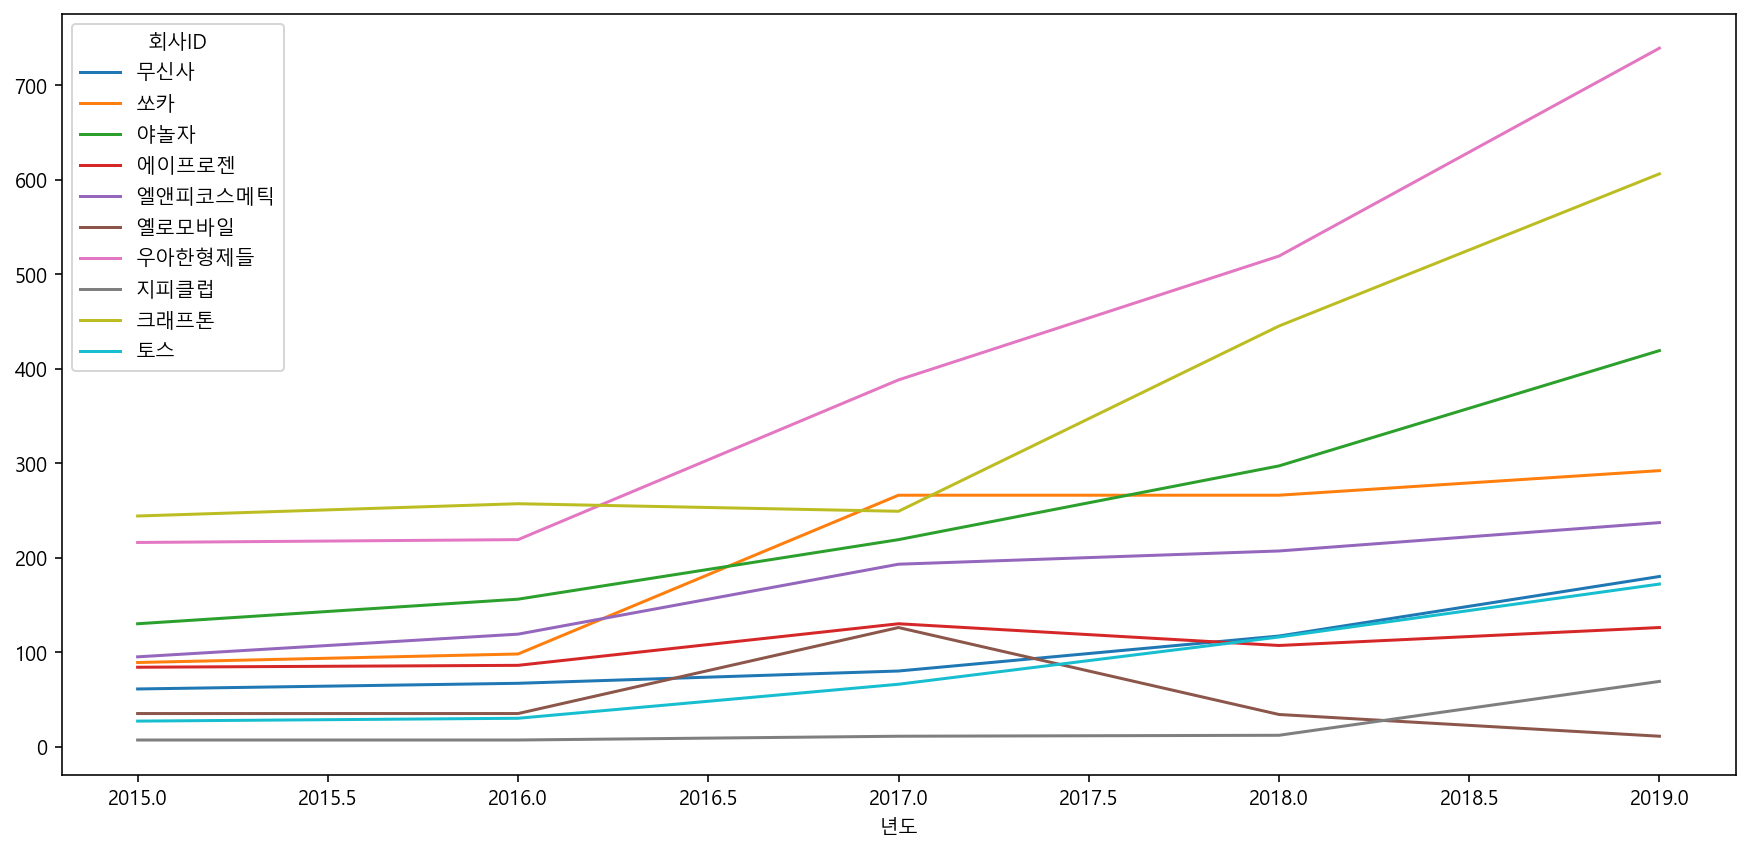

In [160]:
# 쿠팡 직원수가 다른 기업에 비해 매우 높으므로 그래프를 그리면 다른 기업들의 추이를 확인하기 어려움. 따라서, 쿠팡 제외하고 시각화
uni.loc[uni['회사ID'] != '쿠팡'].pivot_table(index='회사ID',
                columns='년도',
                values='월별_직원수',
                aggfunc='min').T.plot(kind='line', figsize=(15, 7))

* 유니콘 기업들의 연도별 직원수 최솟값을 본 결과, 대체로 증가하는 추이
* 유니콘 기업 선정을 위해 직원수의 기준이 필요하다

### 월평균 연금보험료 관련

In [150]:
#연금보험료를 다루기 쉽게 데이터프레임 변경 
#월별 연금보험료의 결측치를 고려해 연도별 월 평균 연금보험료로 바꿈
uni4 = uni.groupby(['회사ID','년도']).mean()
uni4.reset_index(inplace=True)
uni4.rename(columns = {'월별_연금보험료' : '연도별_월평균연금보험료'}, inplace = True)
uni4.head()

,회사ID,년도,연매출액,월,연도별_월평균연금보험료,월별_직원수
0,무신사,2015,32930316.00,11.50,5921860.50,63.50
1,무신사,2016,47231240.00,6.50,7283040.33,74.25
2,무신사,2017,67721259.00,6.50,9954748.00,92.67
3,무신사,2018,105012384.00,6.50,16969701.42,143.58
4,무신사,2019,210312756.00,6.50,36105729.83,266.50


In [152]:
#기간 내 연금보험료 평균값이 높은 기업 분석
uni5 = uni4[['회사ID','연도별_월평균연금보험료']]
uni5 = uni5.groupby(['회사ID']).mean()
uni5.reset_index(inplace=True)
uni5.sort_values(by='연도별_월평균연금보험료',ascending=False,inplace=True)
uni5

,회사ID,연도별_월평균연금보험료
8,쿠팡,802979480.20
6,우아한형제들,762438227.47
10,토스,186789293.03
9,크래프톤,64068470.23
2,야놀자,42779282.34
4,엘앤피코스메틱,25250614.65
1,쏘카,24969436.04
0,무신사,15247016.02
3,에이프로젠,14262471.57
5,옐로모바일,8955012.78


유니콘 기업 선정을 위해 월평균 연금보험료의 기준이 필요하다

### 1인당 연금보험료 연평균 성장률(임금 성장률) 관련

In [105]:
uni2 = uni.copy()
uni2['월연금보험료/월직원수'] = uni2['월별_연금보험료'] / uni2['월별_직원수']

In [106]:
# 유니콘 데이터 1인당 연금보험료 연평균 성장률 계산을 위한 피봇테이블 생성
uni2 = uni2.pivot_table(index='회사ID', columns='년도', values='월연금보험료/월직원수')

# 유니콘 데이터 1인당 연금보험료 연평균 성장률(CARG) 계산
# 유니콘 데이터는 2015년~2019년까지 결측치가 없으므로 <기간수 컬럼 value = 4>로 설정
uni2['기간수'] = 4
uni2['연평균 성장률(%)'] = ((uni2[2019]/uni2[2015]) ** (1/uni2['기간수']) - 1) * 100

display(uni2.describe())
display(uni2.sort_values(by="연평균 성장률(%)", ascending=False).head())

년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,332675.42,346986.41,381093.13,410404.51,442571.70,4.00,5.08
std,473545.52,506524.61,576211.00,620364.39,670807.43,0.00,3.09
min,93344.45,97955.25,91384.62,106823.75,117878.67,4.00,1.25
25%,109466.22,109321.43,112034.78,120805.11,130935.45,4.00,2.80
50%,129905.23,128797.15,132366.36,137369.59,147293.71,4.00,4.45
75%,145350.92,141787.40,145965.78,155148.57,164302.07,4.00,6.80
max,1342831.73,1409297.51,1586949.71,1730305.28,1858434.23,4.00,10.77


년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
회사ID,,,,,,,
토스,1234332.00,1331534.18,1586949.71,1730305.28,1858434.23,4,10.77
무신사,93344.45,97955.25,106840.89,117678.16,133904.69,4,9.44
야놀자,117441.23,108066.54,123614.54,135277.54,153600.66,4,6.94
우아한형제들,1342831.73,1409297.51,1503911.06,1596297.53,1737258.34,4,6.65
크래프톤,143053.02,138837.22,144683.14,157774.69,173417.85,4,4.93


* 유니콘 기업 선정을 위해 1인당 연금보험료 성장률의 기준이 필요하다

## (6) EDA 결론

* 유니콘 기업을 선정하기 위한 기준이 필요
* 기준을 찾기 위해 실제 유니콘 기업들의 외부 데이터를 수집 후 원티드로부터 제공받은 데이터셋과 동일한 포맷으로 세팅
* 주어진 데이터셋에서 활용할 수 있는 변수가 연매출액, 월별 연금보험료, 월별 직원수로 한정적이므로 각 변수들을 조합한 새로운 피처를 생성해야 함
* 기존 피처 간의 조합을 통해 도출가능할 것으로 예상한 피처들을 생성하여 EDA 진행

### EDA를 통해 세운 가설
**1. 직원수가 많으면 유니콘 기업일 확률이 높을 것이다.** <br>
**2. 특정기간에서 1인당 임금성장률이 높으면 유니콘 기업일 확률이 높다.**<br>
**3. 월평균 임금보험료가 높으면 유니콘 기업일 확률이 높다.**<br>
**4. 연매출액이 높으면 유니콘 기업일 확률이 높다.**<br>
**5. 특정기간에서 연매출액 성장률이 높으면 유니콘기업일 확률이 높다.**<br>
**6. 특정기간에서 일인당매출액 성장률이 높으면 유니콘 기업일 확률이 높다.**<br>